You are a data analyst working for a tech company closely monitoring the AI tools market. You want to understand the evolving popularity of three major AI tools, ChatGPT, Gemini, and Microsoft Copilot, and identify which tool is gaining the most traction and how they compare over time.


<img src="ai_tools.jpg" align="center"/>

You'll work with real-world time series data that captures the global interest in these tools over several weeks. Your goal is to analyze this data, uncover patterns, and provide actionable insights to help your company make informed decisions. This might include determining where to focus marketing efforts, predicting future trends, or identifying potential areas for improvement.

Are you ready to help your company stay ahead of the curve in the competitive AI tools market? Let's get started!

### The Data

The Google Trends data is available as a CSV file `ai_tools_comparison.csv`.
The data contains the number of worldwide searches for chatGpt, Gemini, and Microsoft Copilot over the past 12 months as of September 2024. 
<!--- Link to query: https://trends.google.com/trends/explore?q=chatgpt,gemini,%2Fg%2F11tsqm45vd&hl=en-US -->

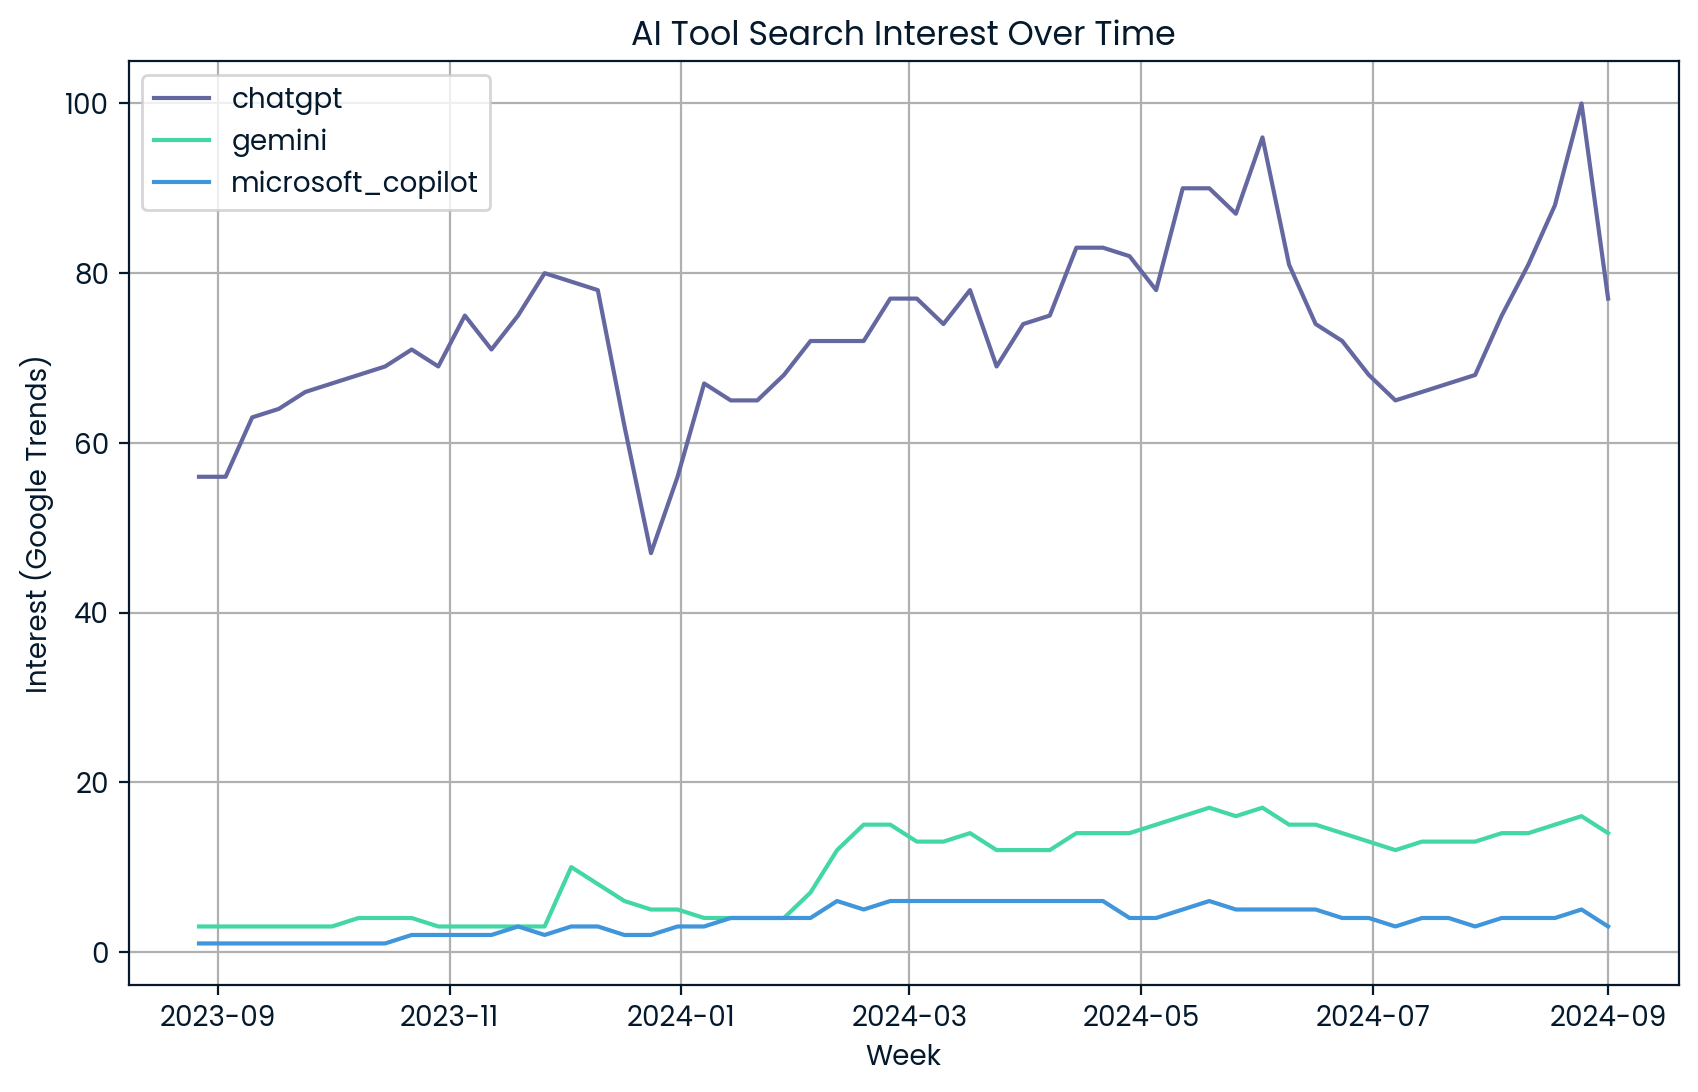

Most consistent tool: chatgpt
The worst month and year for ChatGPT: December 2023
Month with the highest interest: May


In [133]:
import pandas as pd
import matplotlib.pyplot as plt

# load & index
trends = pd.read_csv('ai_tools_comparison.csv')
trends['week'] = pd.to_datetime(trends['week'])
trends = trends.sort_values('week').set_index('week')

tools = ['chatgpt', 'gemini', 'microsoft_copilot']
plt.figure(figsize=(10,6))
for t in tools:
    plt.plot(trends.index, trends[t], label=t)
plt.title('AI Tool Search Interest Over Time')
plt.xlabel('Week'); plt.ylabel('Interest (Google Trends)')
plt.grid(True); plt.legend(); plt.show()

# question 1
growth_rates = trends[tools].pct_change() * 100
std_dev = growth_rates.std(skipna=True)
most_consistent_tool = std_dev.idxmin()
print(f"Most consistent tool: {most_consistent_tool}")

# question 2
gpt_dip = trends['chatgpt'].idxmin().strftime('%B %Y')
print(f"The worst month and year for ChatGPT: {gpt_dip}")

# question 3
monthly = trends[tools].resample('MS').mean()
monthly_overall = monthly.mean(axis=1).dropna()
best_month_idx = monthly_overall.sort_values(ascending=False).index[0]
best_month = best_month_idx.strftime('%B')
print(f"Month with the highest interest: {best_month}")